# Country Data Trends
## Raw Data

This notebook will investigate periodic trends in Covid-19 case and death data, primarily in the UK. All data taken from the [John Hopkins Database](https://coronavirus.jhu.edu/about).

In [110]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '12'

import plotnine as pn
from plotnine import ggplot, geom_point, geom_line, aes

In [111]:
# Import/Generate Data

from country_data import generate_location_df

input_dir = "../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"
output_dir = "../data/"
location_key = "England, United Kingdom"
location = re.sub('\W+','',location_key)

# country_df = generate_location_df(input_dir, location_key)
# country_df.to_csv(output_dir + re.sub('\W+','',location_key) + ".csv")

df = pd.read_csv(output_dir + location + ".csv")
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df.sort_values(by="Date", inplace=True)
print(df.columns.values)

['Unnamed: 0' 'Province_State' 'Country_Region' 'Last_Update' 'Lat'
 'Long_' 'Confirmed' 'Deaths' 'Recovered' 'Active' 'Combined_Key'
 'Incident_Rate' 'Case_Fatality_Ratio' 'Date']


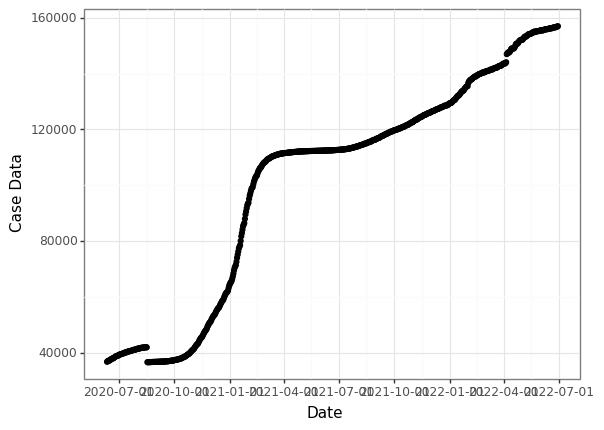

In [112]:
# Transform raw date data into useful format

date_plot = (ggplot(df, aes(x='Date', y='Deaths'))
             + geom_point() + pn.theme_bw()
             + pn.labels.ylab('Case Data'))

# date_plot.save(filename=f"../images/data_trends/case_data_{location}")
print(date_plot)


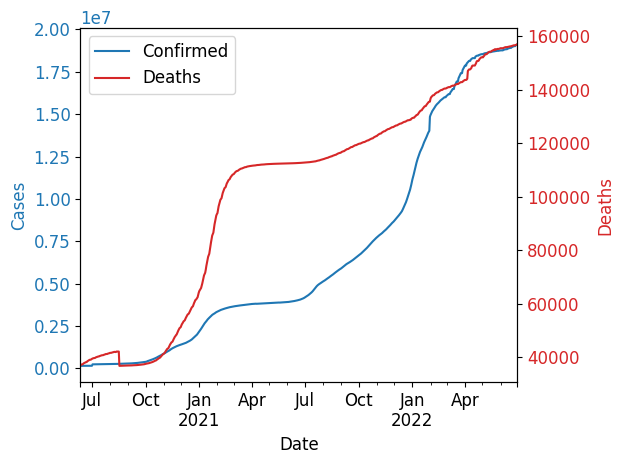

In [113]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Cases', color=color)
plot1 = df.plot.line('Date', 'Confirmed', ax=ax1, color=color, legend=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Deaths', color=color)
plot2 = df.plot.line('Date', 'Deaths', ax=ax2, color=color, legend=False)
ax2.tick_params(axis='y', labelcolor=color)

lines = [plot.lines[0] for plot in [plot1, plot2]]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels)
fig.tight_layout()
plt.savefig(f"../images/data_trends/cumulative_data_{location}.png")
plt.show()

## Daily Data

Plot the daily reported cases and deaths, flagging inconsistencies in the data (when either cumulative value drops).

In [114]:
df["Daily_Deaths"] = df["Deaths"].diff()
df["Daily_Cases"] = df["Confirmed"].diff()

df[["Daily_Deaths","Daily_Cases"]] = df[["Daily_Deaths","Daily_Cases"]].clip(lower = 0)

print(str((df["Daily_Deaths"] < 0).sum()) + " negative values in death record")
print(str((df["Daily_Cases"] < 0).sum()) + " negative values in cases record")

0 negative values in death record
0 negative values in cases record


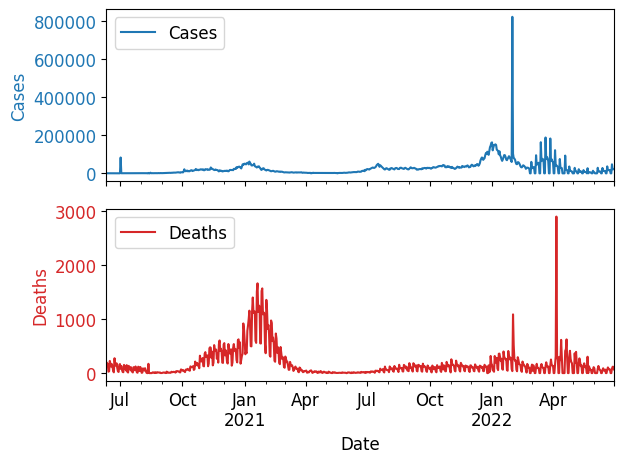

In [115]:
fig, axs = plt.subplots(2)

color = 'tab:blue'
axs[0].set_xlabel('')
axs[0].set_ylabel('Cases', color=color)
plot1 = df.plot.line('Date', 'Daily_Cases', ax=axs[0], color=color, label = "Cases")
axs[0].tick_params(axis='y', labelcolor=color)
axs[0].set_xticklabels([]); axs[0].set_xlabel("")
axs[0].legend(loc=2)

color = 'tab:red'
axs[1].set_ylabel('Deaths', color=color)
plot2 = df.plot.line('Date', 'Daily_Deaths', ax=axs[1], color=color, label = "Deaths")
axs[1].tick_params(axis='y', labelcolor=color)
axs[1].legend(loc=2)

fig.tight_layout()
plt.savefig(f"../images/data_trends/daily_data_{location}.png")
plt.show()

In [116]:
# Plot fourier components of case data